In [1]:
import cmath
import numpy as np
import math
import sys
import sympy as sp
sys.path.append(r'E:\OneDrive\ENGINEERING\01-ENGINEERING TOOLS\engineering_library')
from LSODESolver import *

def print_polar(n):
    print(cmath.polar(n)[0],'/__',360*cmath.polar(n)[1]/(2*cmath.pi),'deg')

def AngleDegrees(n):
    return 360*cmath.polar(n)[1]/(2*cmath.pi)

def parallel(Zlist):
    ans = 0
    for i in Zlist:
        ans = ans + i**-1
    return ans**-1

def ComplexPolar(z,thetaDeg):
    return z*np.cos(math.radians(thetaDeg)) + z*np.sin(math.radians(thetaDeg))*1j

def Z_magnitude(n):
    return cmath.polar(n)[0]

def ComplexConjugate(N):
    return N.real - N.imag*1j

# Q1

In [2]:
Vs = 50
R1 = 15
L = 2

In [5]:
Ra = parallel([5,10])
V1 = Vs*Ra/(15+Ra)
Iinf = V1/5
print(Iinf)

1.8181818181818183


In [8]:
k1 = Iinf
k2 = 32/11 - k1
tau = -k2/(-6)

print(k1)
print(k2)
print(tau)

1.8181818181818183
1.0909090909090908
0.1818181818181818


In [9]:
k1 + k2

2.909090909090909

# Q2

In [10]:
Is = 10
R = 15
L = 10
C = 3

No handles with labels found to put in legend.


root1: -0.022321875446915662
root2: -4.977678124553084
Over dammped
Solution to the differential equation:
0.0 + 0.33633639699815626 e^( -0.022321875446915662 x )  +  -0.33633639699815626 e^( -4.977678124553084 x )


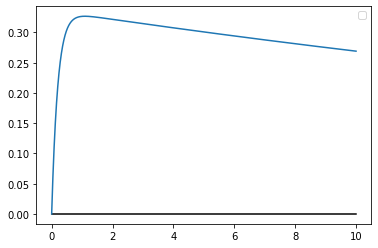

In [11]:
Q2 = LSODECC(3,15,1/3,0)
Q2.initial_conditions([0,0],[0,5/3])
Q2.plot(0,10)

In [13]:
x = sp.symbols('x')
Vc = 0.33633639699815626 * sp.exp( -0.022321875446915662 * x )  +  -0.33633639699815626 * sp.exp( -4.977678124553084 * x )
Vcp = Vc.diff(x)
display(Vc)

-0.336336396998156*exp(-4.97767812455308*x) + 0.336336396998156*exp(-0.0223218754469157*x)

In [14]:
Il = 10-3*Vcp
display(Il)

10 - 5.02252297748617*exp(-4.97767812455308*x) + 0.0225229774861717*exp(-0.0223218754469157*x)

# Q3

In [15]:
I0 = 10
R = 30
k = 3

In [25]:
k11 = 1/30 + 1/(-5*(1j)) + 1/(5*(1j)) + 0.2
k12 = -1/(5*(1j)) - 0.8
k21 = -0.2 - 1/(-5*(1j)) 
k22 = 0.8 + 1/(5*(1j)) + 1/(-5*(1j))

K = np.array([[k11,k12],[k21,k22]])
B = np.array([ComplexPolar(I0,0),0])

print(K)

Ans = np.linalg.solve(K,B)
print(Ans)

[[ 0.23333333+0.j  -0.8       +0.2j]
 [-0.2       -0.2j  0.8       +0.j ]]
[ -7.31707317+65.85365854j -18.29268293+14.63414634j]


In [19]:
V1 = Ans[0]
Vx = Ans[1]

print_polar(V1)
print_polar(Vx)

66.25891564490793 /__ 96.3401917459099 deg
23.426064283290913 /__ 141.3401917459099 deg


In [20]:
I1 = V1/R
print_polar(I1)

2.208630521496931 /__ 96.3401917459099 deg


In [21]:
I4 = Vx/(-5*(1j))
print_polar(I4)

4.6852128566581825 /__ -128.6598082540901 deg


In [22]:
I2 = V1/(-5*(1j))
print_polar(I2)

13.251783128981588 /__ -173.6598082540901 deg


In [23]:
I3 = (V1-4*Vx)/(5)
print_polar(I3)

13.251783128981588 /__ 6.3401917459099 deg


In [24]:
I1x = (V1-Vx)/(5*(1j))
print_polar(I1x)

10.476454436543674 /__ -12.094757077012108 deg


## finding resistance

In [26]:
V1p = (30/7)*(ComplexPolar(10,0)+ComplexPolar(0.2,0))
print(V1p)

(43.71428571428571+0j)


In [27]:
i = 1/(-5*(1j)) + ((1-V1p)/(5*(1j))) + ((1-V1p)/(5))
print_polar(i)

12.223663901779755 /__ 134.337103205218 deg


In [28]:
Zth = 1/i
print_polar(Zth)

0.08180853204368624 /__ -134.337103205218 deg


In [29]:
In = Vx/Zth
print_polar(In)

286.35233634043516 /__ -84.32270504887211 deg


# Q4

In [30]:
Vp = 200
theta = 10
Rl = 30
Xl = 5
Rd = 25
Xd = -20

In [32]:
Van = ComplexPolar(Vp,theta)
Zl = Rl + Xl*(1j)
Zd = Rd + Xd*(1j)

In [34]:
Vab = (3**0.5)*Vp*ComplexPolar(1,30)
Vbc = Vab*ComplexPolar(1,-120)
print_polar(Vab)
print_polar(Vbc)

346.41016151377545 /__ 29.999999999999996 deg
346.4101615137754 /__ -90.0 deg


In [36]:
Z = Zl+Zd
Iab = Vab/Z

Ia = Iab*ComplexPolar(3**0.5,-30)
print_polar(Iab)

6.0764362025019985 /__ 45.25511870305777 deg


In [38]:
print_polar(Ia)
Ic = Ia*ComplexPolar(1,+120)
print_polar(Ic)

10.524696231684349 /__ 15.255118703057775 deg
10.524696231684349 /__ 135.25511870305778 deg


In [42]:
Sl = 3*(Vab)*ComplexConjugate(Iab)
print_polar(Sl)

6314.817739010609 /__ -15.255118703057775 deg


In [43]:
Ss = Sl + 3*(Vp**2)/ComplexConjugate(Zl)
print_polar(Ss)

10035.446532675418 /__ -5.792796495032157 deg


# Q5

In [44]:
x = 0.01
w = 0.08
h = 0.1
lg = 0.001
I = 10
Wg = 0.2 #J
mu_r =  3000

# Q6

In [68]:
N1 = 50
N2 = 30
A = 0.25E-4
R = 0.04
mu_r =  1000
i1 = 2
i2 = 4

In [69]:
l = 2*np.pi*R
Rc = l/(mu_r*4*np.pi*(1E-7)*A)


display(Rc)



8000000.000000003

In [70]:
phi = (i1*N1 + i2*N2)/Rc
B = phi/A
print(B)

1.0999999999999996


In [71]:
Wvg = (B**2)/(2*mu_r*4*np.pi*(1E-7))
print(Wvg)

481.4437028529832


# Q7

In [58]:
Vs = 350
nm = 1400
Prot = 1200
Rs = 1.6
Xs = 0.8
Xm = 45
Rpr = 1.2
Xpr = 0.6

p = 4
f = 50 #hz

In [64]:
def parallel(Z1, Z2):
    return (1/Z1 + 1/Z2)**(-1)

def motor(f, p, V, n_m, P_rot, R_s, X_s, X_m, R_r, X_r):
    Z_s = R_s + 1j*X_s
    print('Z_s = {} Ohm'.format(Z_s))

    n_s = 120*f/p
    print('n_s = {} RPM'.format(n_s))

    s = (n_s-n_m)/n_s
    print('s = {}%'. format(s*100))

    Z_r = R_r/s + 1j*X_r
    print('Z_r = {} Ohm'.format(Z_r))

    Z_tot = Z_s + parallel(1j*X_m, Z_r)
    print('Z_tot = {} Ohm'.format(Z_tot))

    pf = np.cos(np.angle(Z_tot))
    if np.angle(Z_tot) > 0:
        print('pf = {}% lag'.format(pf*100))
    if np.angle(Z_tot) < 0: 
        print('pf = {}% lead'.format(pf*100))

    V_s = V/np.sqrt(3)
    print('V_s = {} V RMS'.format(V_s))

    I_s = V_s/Z_tot
    print('I_s = {} A'.format(I_s))

    I_r = I_s*((1j*X_m)/(1j*X_m + Z_r))
    print('I_r = {} A'.format(I_r))

    P_in = np.real(3*V_s*np.conj(I_s))
    print('P_in = {} W'.format(P_in))

    P_Cu_s = 3*np.absolute(I_s)**2*R_s
    print('P_Cu_s = {} W'.format(P_Cu_s))

    P_Cu_r = 3*np.absolute(I_r)**2*R_r
    print('P_Cu_r = {} W'.format(P_Cu_r))

    R_dev = (1-s)/s*R_r
    print('R_dev = {} Ohm'.format(R_dev))

    P_dev = 3*np.absolute(I_r)**2*R_dev
    print('P_dev = {} W'.format(P_dev))

    P_out = P_dev - P_rot
    print('P_out = {} W'.format(P_out))

    omega_m = n_m*2*np.pi/60 # rad/s
    T_out = P_out/omega_m # Nm
    print('T_out = {} Nm'.format(T_out))

    n = P_out/P_in
    print('efficiency = {}%'.format(n*100))

In [65]:

motor(f, p, Vs, nm, Prot, Rs, Xs, Xm, Rpr, Xpr)

Z_s = (1.6+0.8j) Ohm
n_s = 1500.0 RPM
s = 6.666666666666667%
Z_r = (18+0.6j) Ohm
Z_tot = (16.766267225883762+7.378789694427801j) Ohm
pf = 91.52821848332914% lag
V_s = 202.07259421636903 V RMS
I_s = (10.096737182809038-4.4435472289766205j) A
I_r = (10.11824194236203-0.39103663029454827j) A
P_in = 6120.821626953288 W
P_Cu_s = 584.108225831349 W
P_Cu_r = 369.1142267414626 W
R_dev = 16.8 Ohm
P_dev = 5167.599174380476 W
P_out = 3967.599174380476 W
T_out = 27.062700891856103 Nm
efficiency = 64.82134942323742%


In [66]:
Is = 10.096737182809038-4.4435472289766205j
print_polar(Is)

11.031283411954584 /__ -23.754167136067068 deg


In [67]:
Ir = 10.11824194236203-0.39103663029454827j
print_polar(Ir)


10.125795260146546 /__ -2.21319121752863 deg
